# Oscilador armónico amortiguado

Queremos resolver la ecuación

$$
\ddot{y} + 2\gamma \dot{y} + \omega_0 \sin(y) = e^{-t} 
$$
Con
$
\gamma =1 ; \omega_0 = 0.5
$
;Haciendo el cambio de variable: 
$$
\dot{y} = u \Rightarrow \dot{u} = -2\gamma u -\omega_0^{2} \sin(y) + e^{-t}
$$

In [8]:
from pylab import *
%matplotlib inline

In [9]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): #xrange ocupa menos memoria para cualquier for que valga mas de 100
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

### Vamos a definir nuestras ecuaciones diferenciales

In [10]:
def p(y,t): #la ecuación diferencial
    return array([y[1],-2*y[1]-0.5*sin(y[0])+sin(t)]) 
def dp(y,t): #la derivada de la ecuación diferencial
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])

### Ahora va a integrar :)
Para esto vamos a usar la ecuación "integra2" que definimos en la Clase 5 (29 ago)

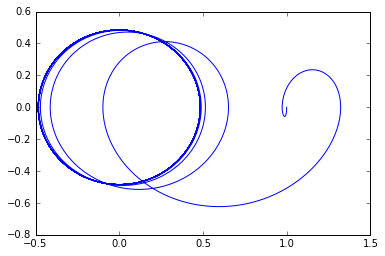

In [11]:
t,y=integra2(p,dp,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1]) #este es el espacio fase

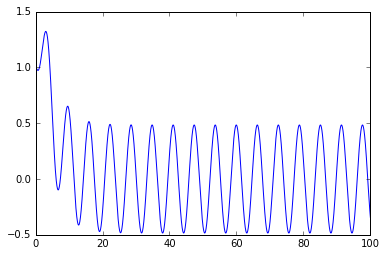

In [12]:
plot(t,y[:,0]) #esto es en el espacio físico

# Método de Runge-Kutta de segundo orden

Partimos de:

$$
\vec{y} _{n+1} = \vec{y} _n + \int_{x_n}^{x_{n+1}} \vec{f} (x,\vec{y}) dx
$$
Con: 
$$
\vec{f} (x) = \vec{f}(x_0) + \vec{f}'(x_0)x + \vec{f}''(x_0) \frac{x^2}{2!} + \mathcal{O}(h^3)
$$
donde $ x \epsilon [0,h] $


$$
\Rightarrow \vec{y}_{n+1}=\vec{y}_{n} + h\vec{f} (x_{n+\frac{1}{2}},\vec{y}_{n+\frac{1}{2}}) + \mathcal{O}(h^3)
$$
$$
\Rightarrow \vec{y}_{n+\frac{1}{2}} = y_n + \frac{h}{2} f(x_n,y_n)
$$
$$
\Rightarrow \vec{y}_{n+\frac{1}{2}}= \vec{y}_n + hf(x_n +\frac{1}{2}h,y_n + \frac{h}{2}f(x_n,y_n))
$$



Y $k=hf(x_n,y_n)$

$$
\Rightarrow  \vec{y}_{n+\frac{1}{2}}=\vec{y}_n + hf(x_n +\frac{1}{2}h,y_n + \frac{1}{2}k)
$$

La definición de nuestra función (la última)

In [6]:
def rk(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h) #la ec.dif evaluada en la primera entrada y tiempos
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol


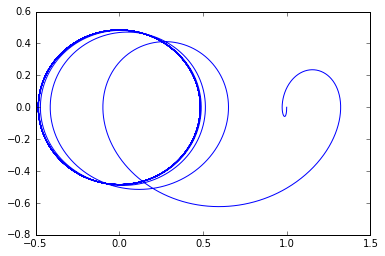

In [13]:
t,y=rk(p,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])